# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

#!pip install scikit-learn 
#!pip install sklearn
#!pip install missingno 
#!pip install summarytools
#!pip install ydata-profiling

In [ ]:
import scipy.stats as stats
import inflection
from skimpy import clean_columns
import missingno as msno
import plotly.graph_objects as go
from scipy.stats import skew

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from scipy.stats import skew
from summarytools import dfSummary
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv("final_scout_not_dummy.csv")
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.362609,New,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3
15911,Renault Espace,Van,39885,VAT deductible,9900.000000,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.0,1.0,165.0,0,Metallic,Cloth,Automatic,1798.0,1708.0,front,7.4
15912,Renault Espace,Van,39875,VAT deductible,15.000000,Pre-registered,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.0,1.0,146.0,1,Metallic,Part/Full Leather,Automatic,1997.0,1734.0,front,5.3
15913,Renault Espace,Van,39700,VAT deductible,10.000000,Pre-registered,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [4]:
df.shape

(15915, 23)

In [14]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [7]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

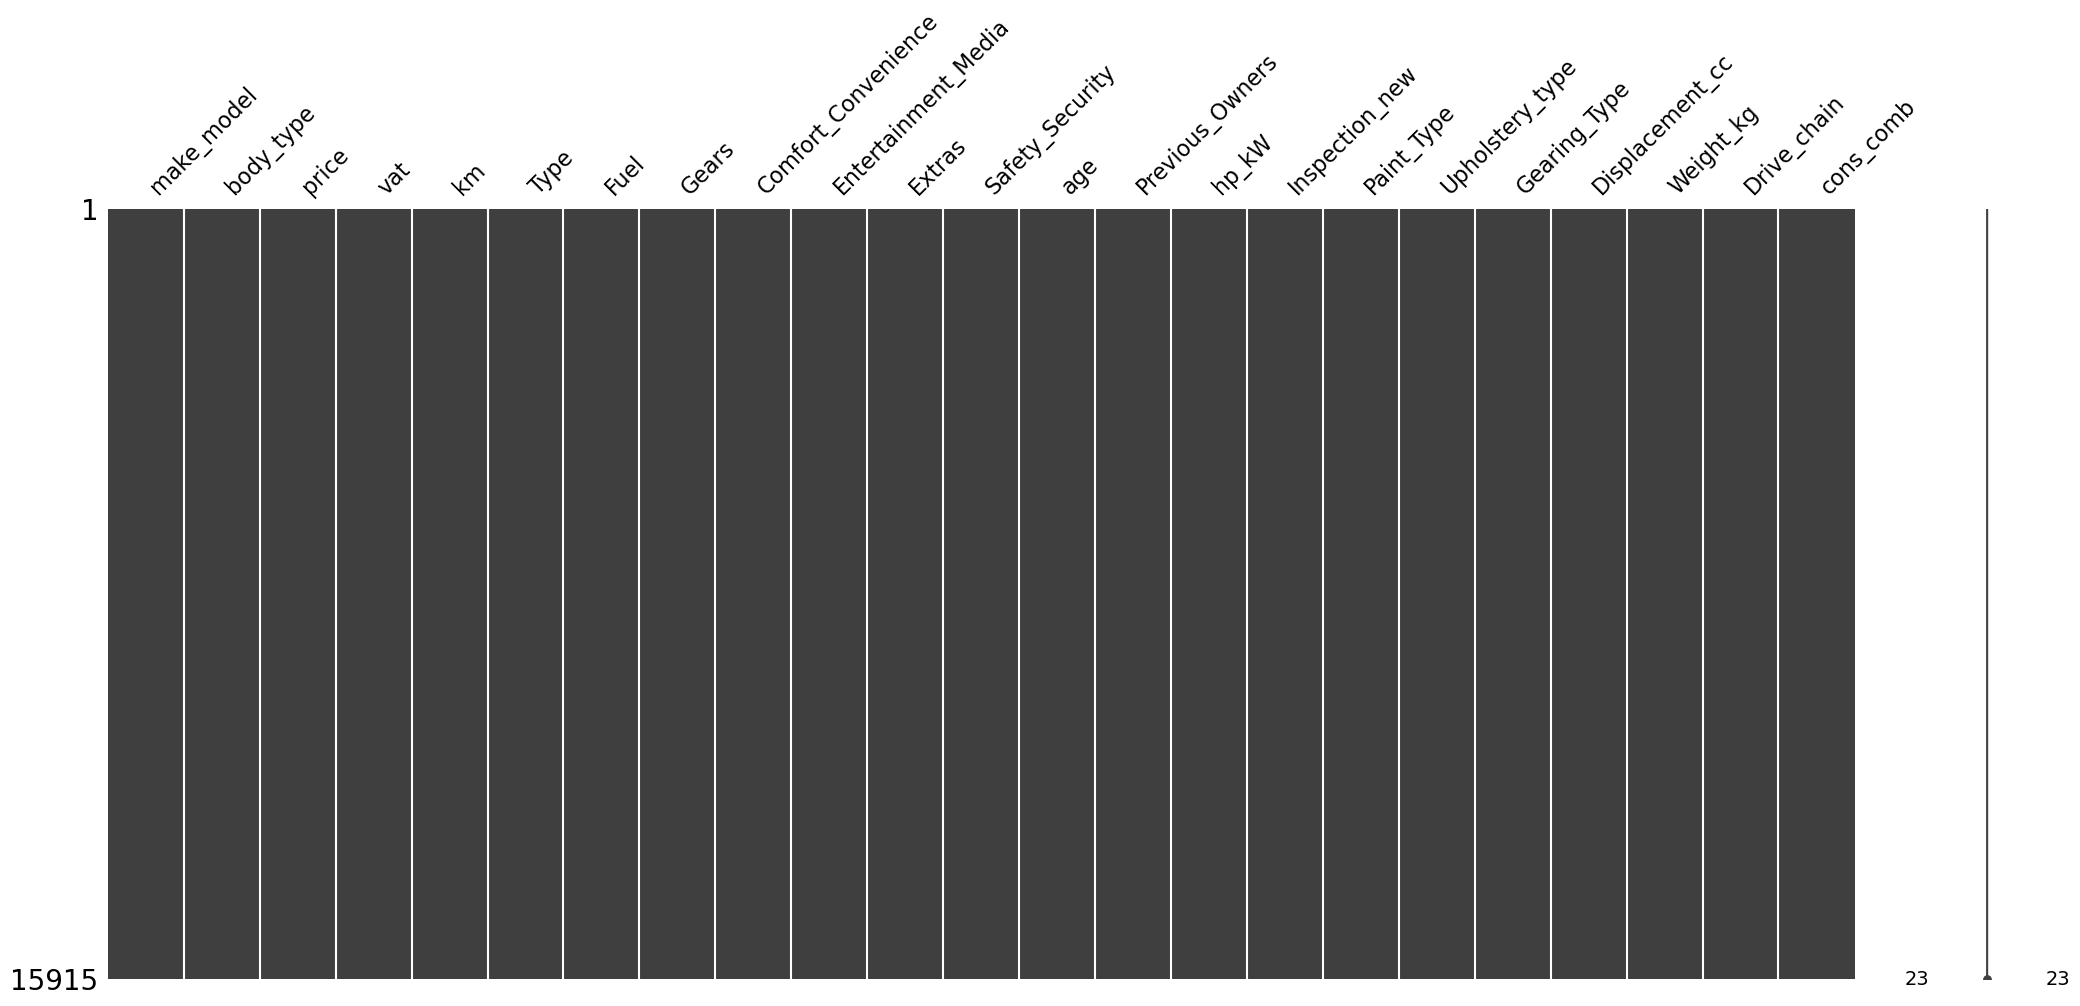

In [8]:
msno.matrix(df);

In [10]:
df.sort_values(by="price", ascending=False)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
3648,Audi A3,Sedans,74600,VAT deductible,13000.0,Used,Benzine,7.0,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Sport seats,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",1.0,1.0,294.0,0,Metallic,Part/Full Leather,Semi-automatic,2480.0,1490.0,4WD,8.3
15822,Renault Espace,Van,68320,VAT deductible,4307.0,Demonstration,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack","ABS,Adaptive Cruise Control,Adaptive headlight...",0.0,1.0,118.0,0,Metallic,Part/Full Leather,Automatic,1598.0,1734.0,front,6.5
3649,Audi A3,Compact,67600,VAT deductible,37747.0,Used,Benzine,7.0,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Sport suspe...","ABS,Alarm system,Central door lock,Driver-side...",2.0,1.0,294.0,0,Metallic,Part/Full Leather,Semi-automatic,2480.0,1485.0,4WD,8.3
3587,Audi A3,Sedans,64900,VAT deductible,35000.0,Used,Benzine,7.0,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",1.0,1.0,294.0,0,Metallic,Part/Full Leather,Semi-automatic,2480.0,1585.0,front,8.3
15824,Renault Espace,Van,64332,VAT deductible,1.0,New,Benzine,6.0,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",0.0,1.0,165.0,0,Metallic,Part/Full Leather,Automatic,1798.0,1647.0,front,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13766,Renault Clio,Sedans,5445,VAT deductible,123000.0,Used,Diesel,5.0,Air conditioning,Radio,Alloy wheels,Central door lock with remote control,3.0,1.0,55.0,0,Metallic,Cloth,Manual,1461.0,1146.0,front,3.6
8822,Opel Corsa,Compact,5300,VAT deductible,173021.0,Used,Diesel,5.0,"Air conditioning,Electrical side mirrors,Navig...","CD player,On-board computer",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",3.0,1.0,55.0,0,Metallic,Cloth,Manual,1248.0,1163.0,front,3.9
8824,Opel Corsa,Transporter,5250,VAT deductible,80000.0,Used,Diesel,5.0,"Air conditioning,Electrical side mirrors,Multi...","Bluetooth,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Central door lock with r...",3.0,1.0,55.0,0,Uni/basic,Cloth,Manual,1248.0,1199.0,front,3.8
8823,Opel Corsa,Compact,4990,VAT deductible,79000.0,Used,Benzine,5.0,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",3.0,1.0,66.0,0,Metallic,Cloth,Manual,1398.0,1141.0,front,5.2


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [5]:
pip install seaborn --upgrade

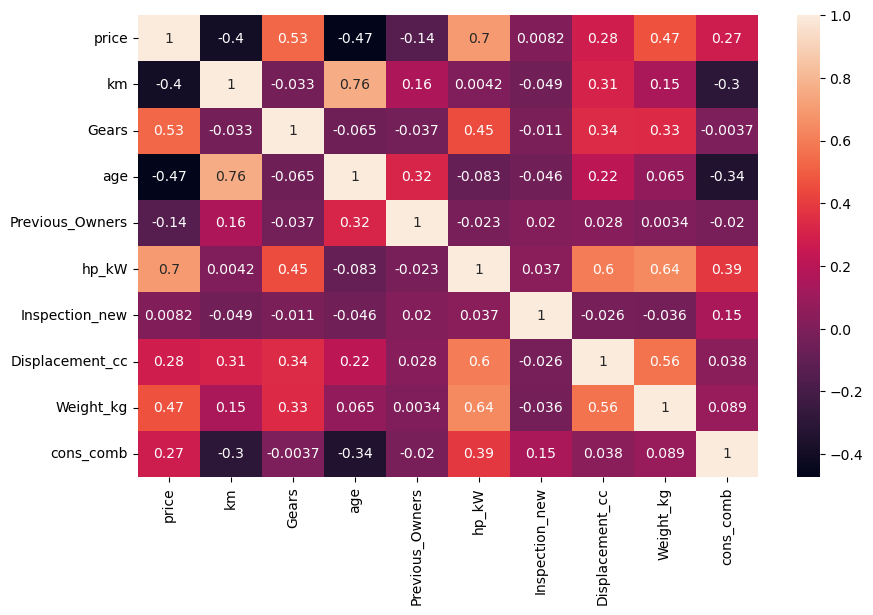

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

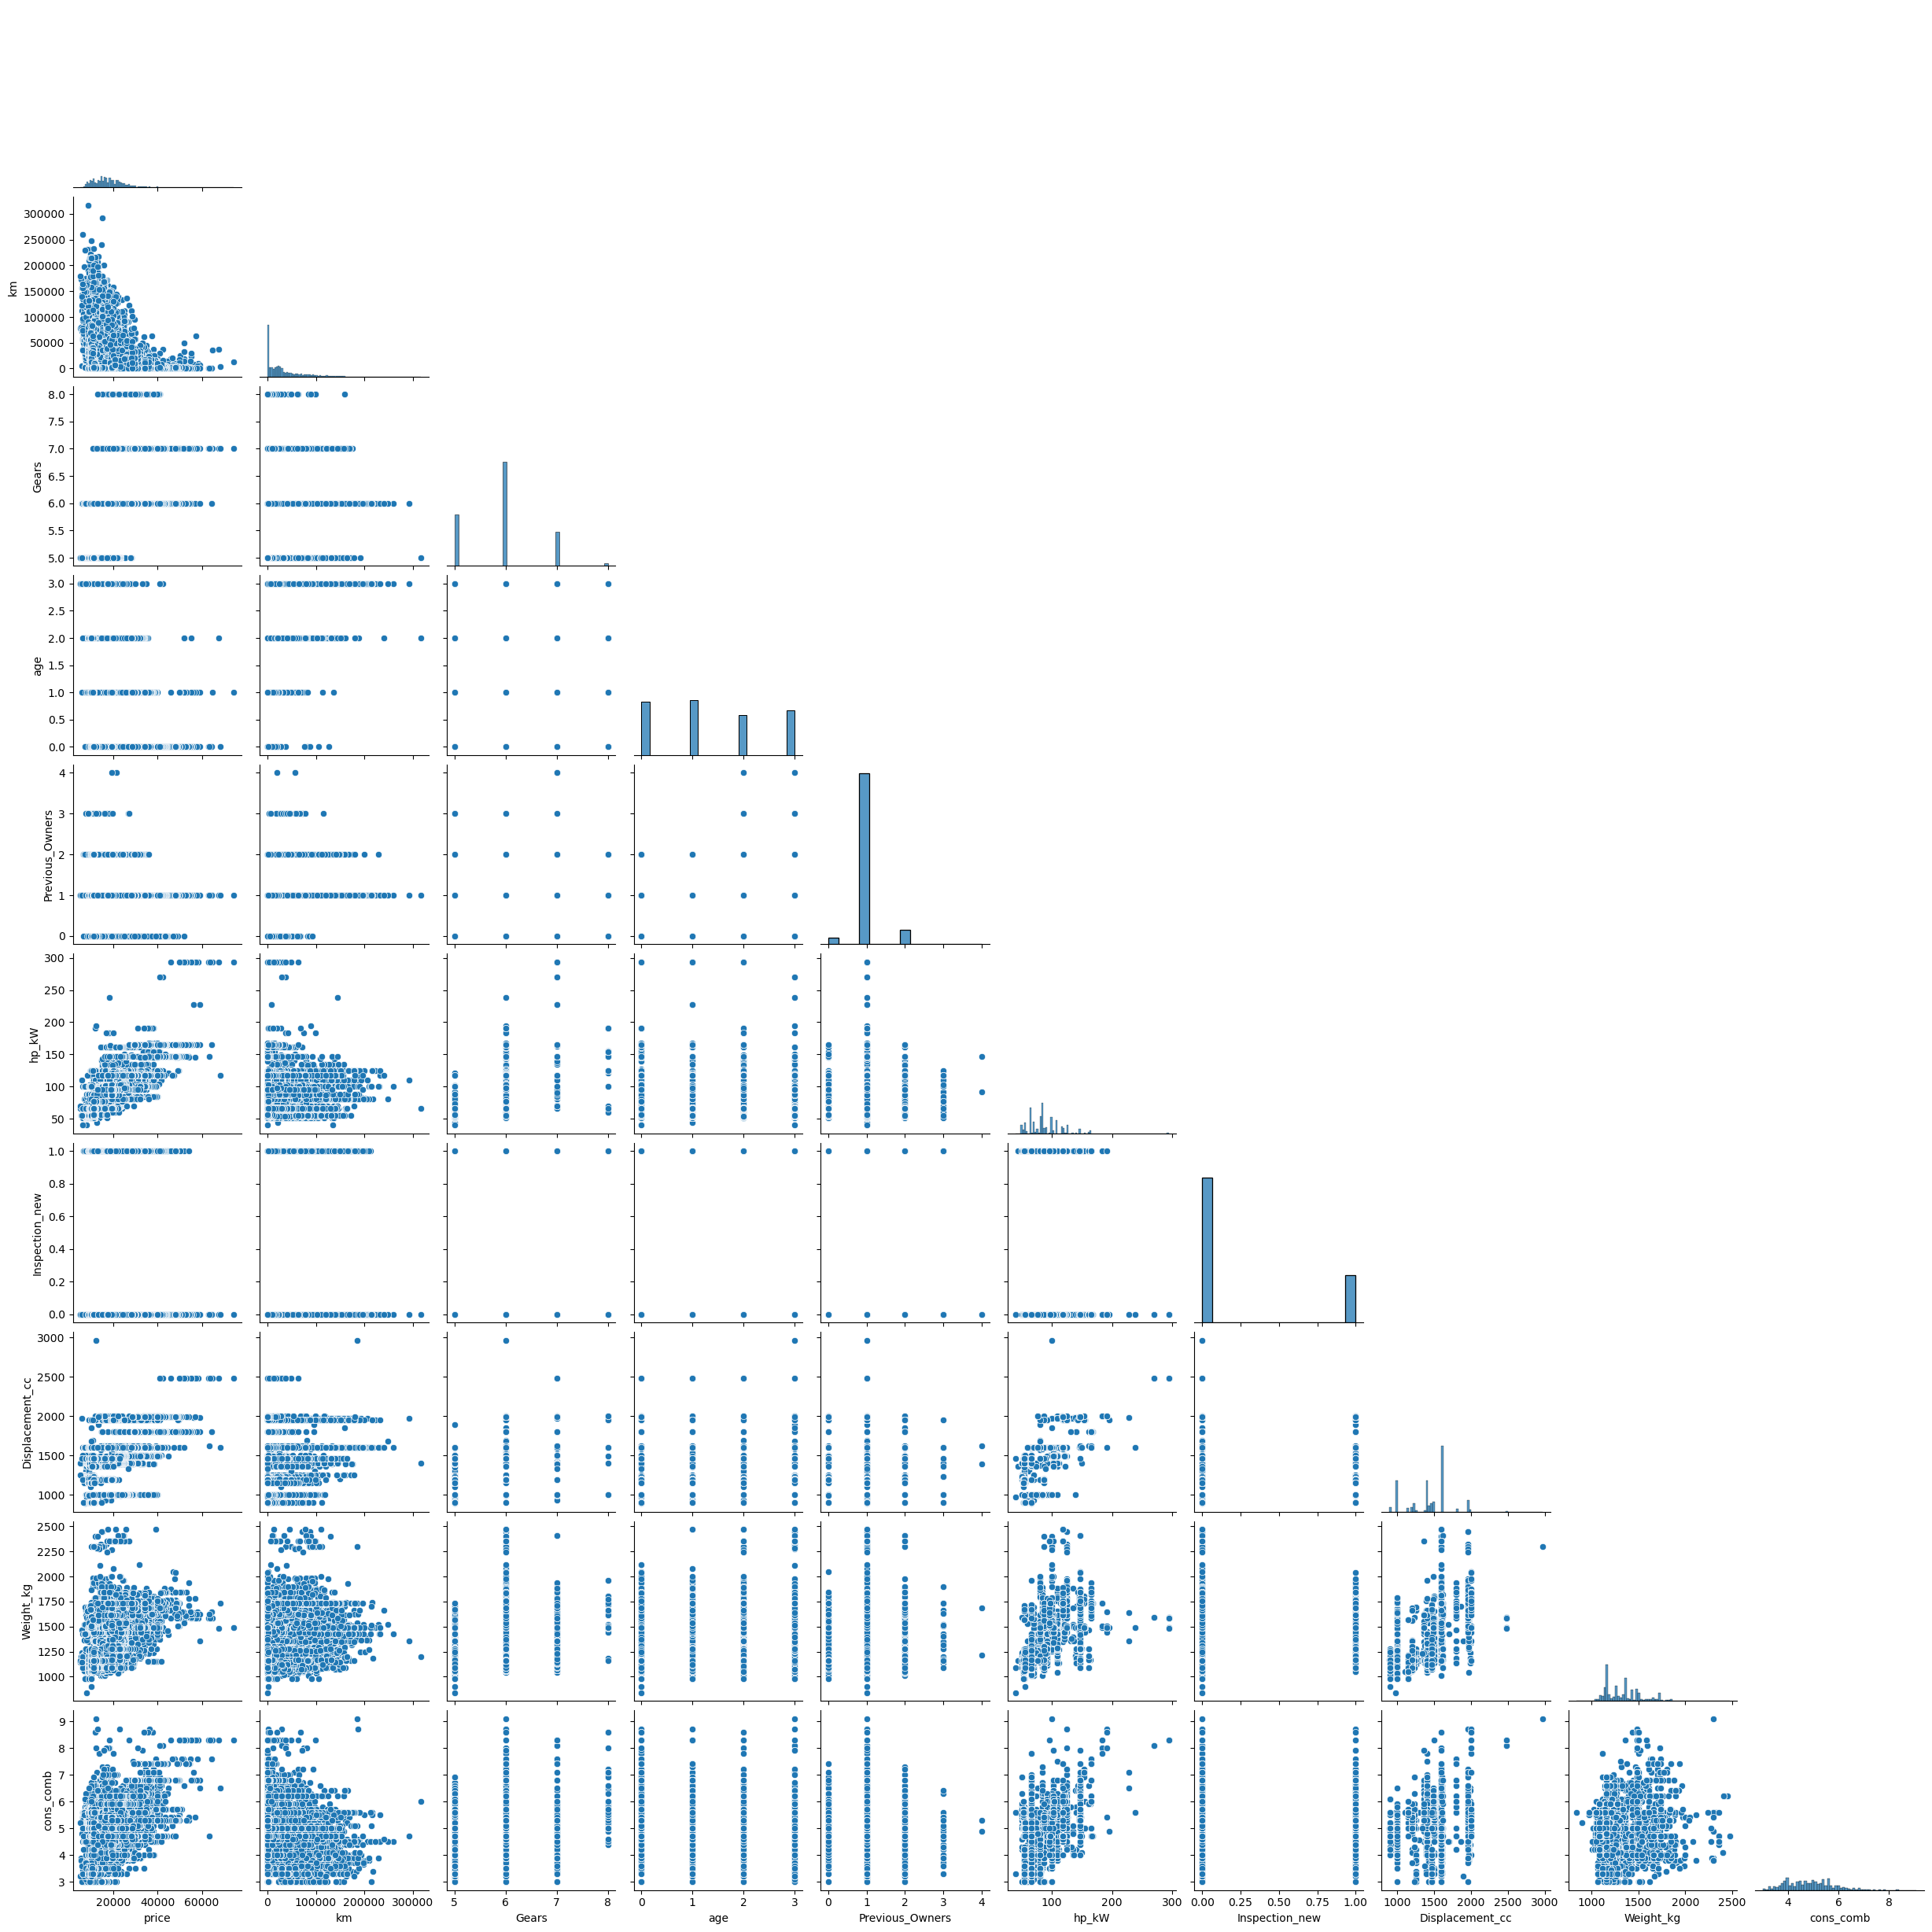

In [15]:
sns.pairplot(df, 
             corner=True)

plt.show()

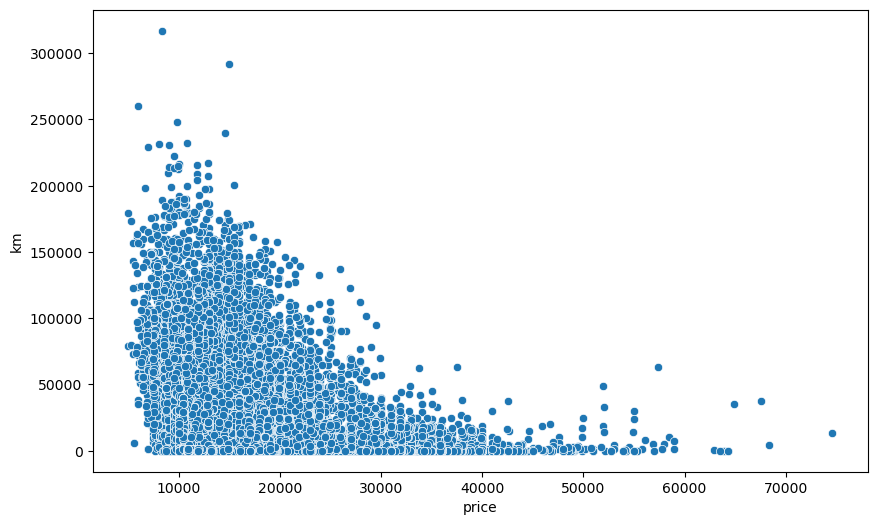

In [19]:
sns.scatterplot(x = "price", y = "km", data = df);

''

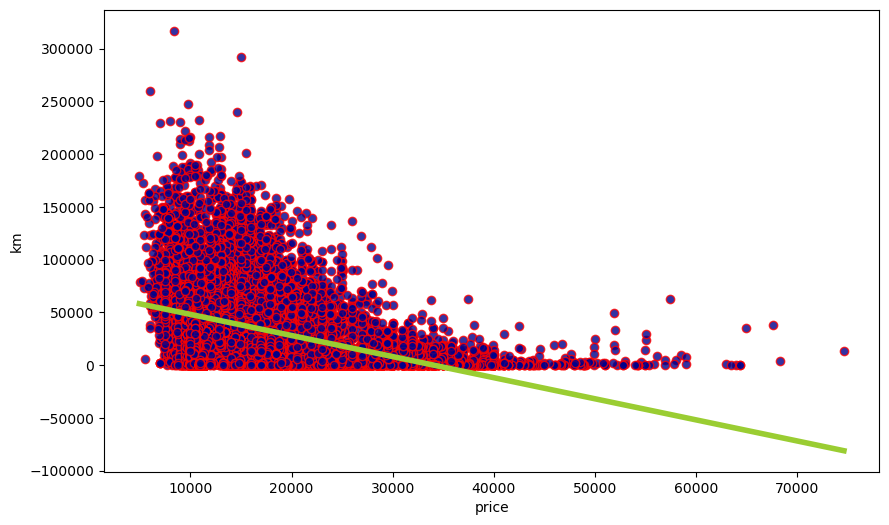

In [21]:

sns.regplot( x ="price" ,
            y= "km",
            data=df, 
            ci=None,
            line_kws={"color": "yellowgreen", "lw": 4},
  scatter_kws={"color": "darkblue", "edgecolor": "red"})
;

In [17]:
corr= df.corr(numeric_only=True)

In [26]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "yellowgreen"
    else:
        color = 'white'
    return f'background-color: {color}'
pd.DataFrame.corr(corr).style.applymap(color_red)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000000,-0.789838,0.746029,-0.859195,-0.582389,0.890307,-0.104468,0.337647,0.636260,0.531516
km,-0.789838,1.000000,-0.420146,0.954972,0.323906,-0.536778,-0.283913,0.161947,-0.169699,-0.772199
Gears,0.746029,-0.420146,1.000000,-0.483218,-0.484581,0.655033,-0.279830,0.428420,0.536788,0.056506
age,-0.859195,0.954972,-0.483218,1.000000,0.484827,-0.647410,-0.247721,0.031834,-0.289139,-0.789707
Previous_Owners,-0.582389,0.323906,-0.484581,0.484827,1.000000,-0.597318,-0.130841,-0.351074,-0.456328,-0.357902
hp_kW,0.890307,-0.536778,0.655033,-0.647410,-0.597318,1.000000,-0.272248,0.627942,0.805529,0.478264
Inspection_new,-0.104468,-0.283913,-0.279830,-0.247721,-0.130841,-0.272248,1.000000,-0.462475,-0.413862,0.187432
Displacement_cc,0.337647,0.161947,0.428420,0.031834,-0.351074,0.627942,-0.462475,1.000000,0.756713,-0.149395
Weight_kg,0.636260,-0.169699,0.536788,-0.289139,-0.456328,0.805529,-0.413862,0.756713,1.000000,0.074909
cons_comb,0.531516,-0.772199,0.056506,-0.789707,-0.357902,0.478264,0.187432,-0.149395,0.074909,1.000000


In [18]:

R2_score = corr**2 # R2 scoru ile "Engine Size(L)" bu feature la targetin sadece 72% aciklaya biliyoruz.
R2_score

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000000,0.159433,0.281209,0.224181,0.020917,0.484989,0.000067,0.079425,0.219430,0.074126
km,0.159433,1.000000,0.001100,0.575028,0.024662,0.000018,0.002445,0.094110,0.021638,0.090119
Gears,0.281209,0.001100,1.000000,0.004163,0.001340,0.202314,0.000123,0.115265,0.111508,0.000014
age,0.224181,0.575028,0.004163,1.000000,0.099924,0.006931,0.002071,0.046339,0.004210,0.116488
Previous_Owners,0.020917,0.024662,0.001340,0.099924,1.000000,0.000509,0.000382,0.000782,0.000012,0.000407
hp_kW,0.484989,0.000018,0.202314,0.006931,0.000509,1.000000,0.001340,0.356989,0.407440,0.151252
Inspection_new,0.000067,0.002445,0.000123,0.002071,0.000382,0.001340,1.000000,0.000675,0.001261,0.021849
Displacement_cc,0.079425,0.094110,0.115265,0.046339,0.000782,0.356989,0.000675,1.000000,0.317392,0.001430
Weight_kg,0.219430,0.021638,0.111508,0.004210,0.000012,0.407440,0.001261,0.317392,1.000000,0.007909
cons_comb,0.074126,0.090119,0.000014,0.116488,0.000407,0.151252,0.021849,0.001430,0.007909,1.000000


In [28]:
def color_red(val):
    if val > 0.70 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "yellowgreen"
    else:
        color = 'white'
    return f'background-color: {color}'
pd.DataFrame.corr(R2_score).style.applymap(color_red)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000000,-0.037340,0.312693,0.035003,-0.265830,0.576537,-0.304901,-0.063216,0.196431,-0.132191
km,-0.037340,1.000000,-0.300438,0.809715,-0.124500,-0.397282,-0.207209,-0.175932,-0.320217,-0.031598
Gears,0.312693,-0.300438,1.000000,-0.304960,-0.217463,0.203569,-0.201892,0.017880,0.051436,-0.234934
age,0.035003,0.809715,-0.304960,1.000000,-0.021708,-0.407411,-0.220701,-0.273342,-0.371160,-0.001863
Previous_Owners,-0.265830,-0.124500,-0.217463,-0.021708,1.000000,-0.321501,-0.132319,-0.254750,-0.264496,-0.177089
hp_kW,0.576537,-0.397282,0.203569,-0.407411,-0.321501,1.000000,-0.290644,0.431106,0.568928,-0.044957
Inspection_new,-0.304901,-0.207209,-0.201892,-0.220701,-0.132319,-0.290644,1.000000,-0.234269,-0.237356,-0.123025
Displacement_cc,-0.063216,-0.175932,0.017880,-0.273342,-0.254750,0.431106,-0.234269,1.000000,0.449511,-0.254879
Weight_kg,0.196431,-0.320217,0.051436,-0.371160,-0.264496,0.568928,-0.237356,0.449511,1.000000,-0.242575
cons_comb,-0.132191,-0.031598,-0.234934,-0.001863,-0.177089,-0.044957,-0.123025,-0.254879,-0.242575,1.000000


In [9]:
df_filtered = df.drop(columns="price")

numeric_cols = df_filtered.select_dtypes(include=['number']).columns

for col_name in numeric_cols:
    
    column_skewness = skew(df_filtered[col_name].dropna())
    print(f"{col_name}: {column_skewness}")

km: 1.6228088098444602
Gears: 0.3307396684856817
age: 0.17569299666477714
Previous_Owners: 1.0748027406037113
hp_kW: 1.2924047688801539
Inspection_new: 1.1728981260355587
Displacement_cc: -0.09685865489204284
Weight_kg: 1.08233118507631
cons_comb: 0.41886398435571004


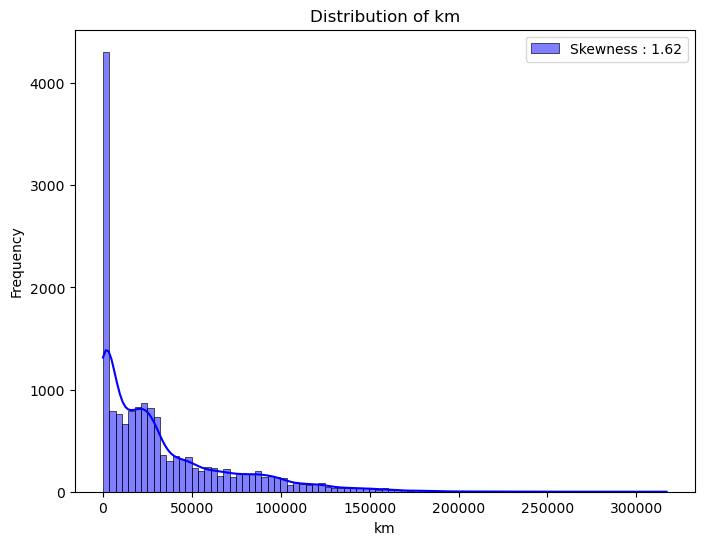

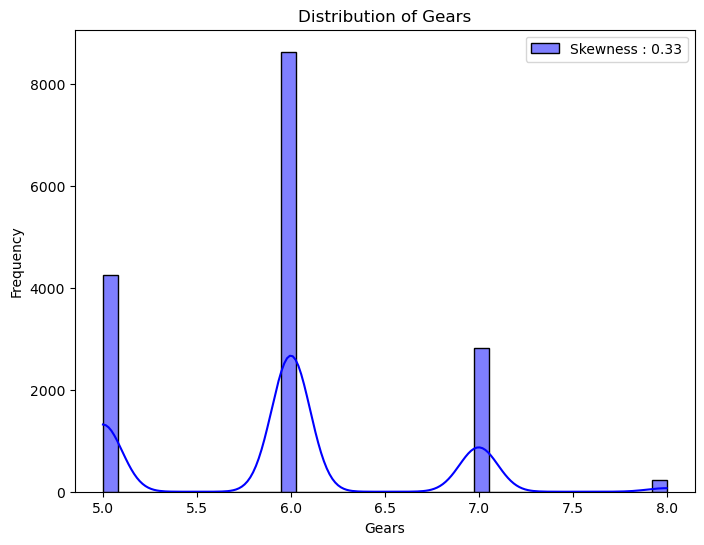

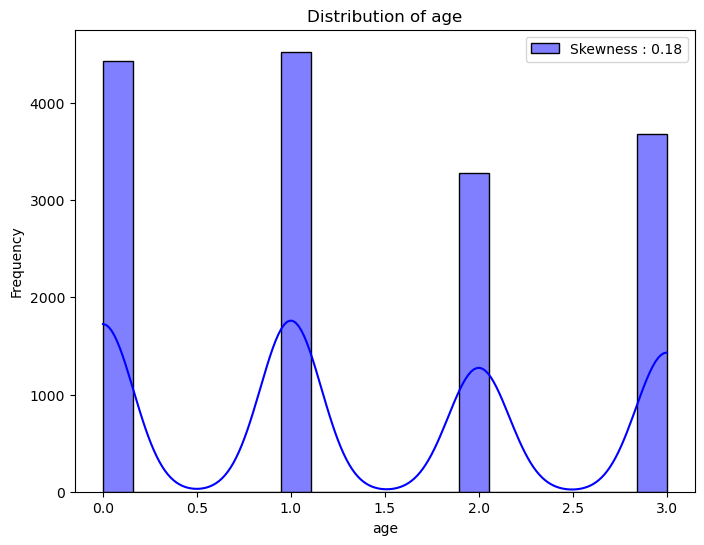

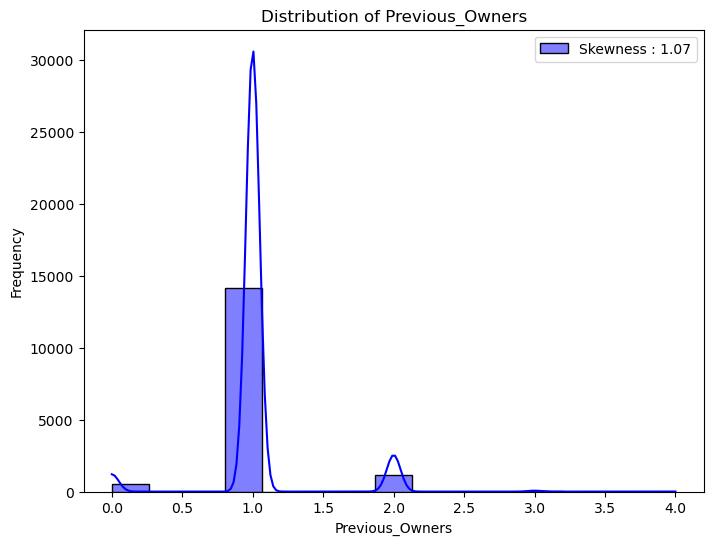

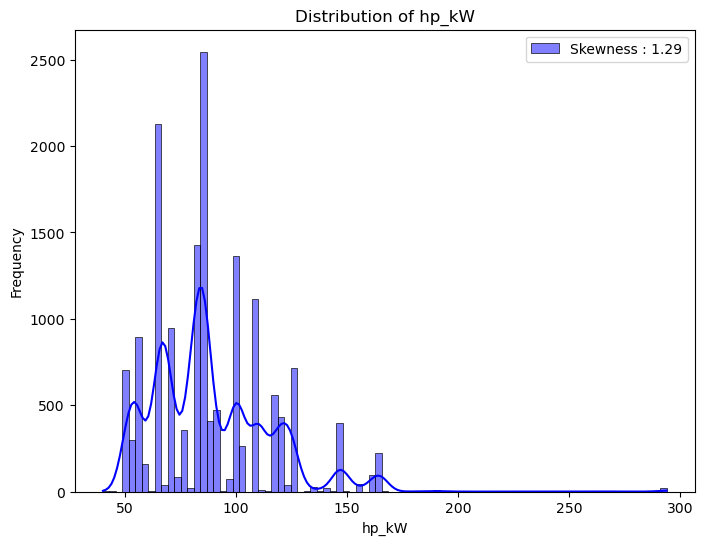

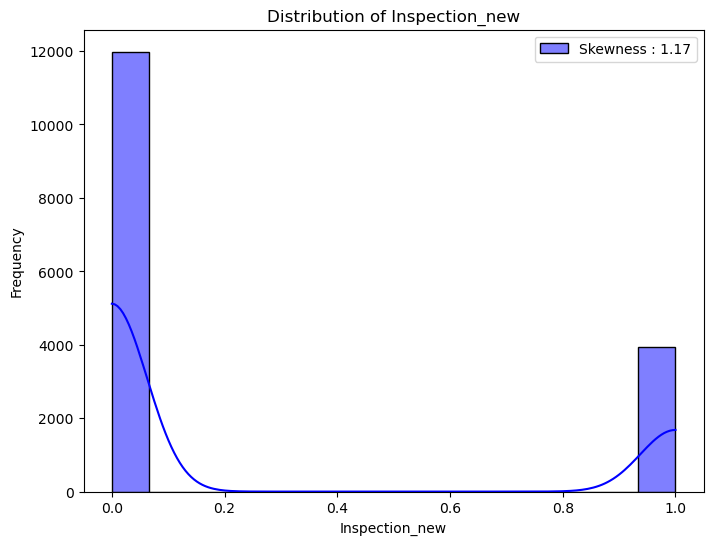

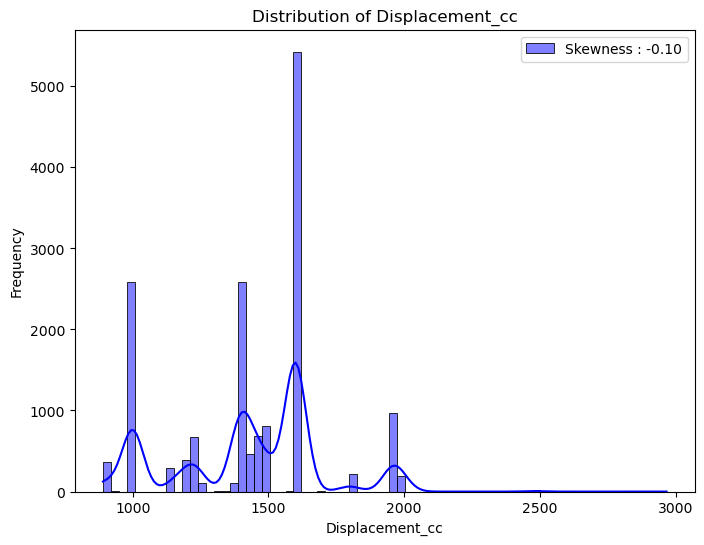

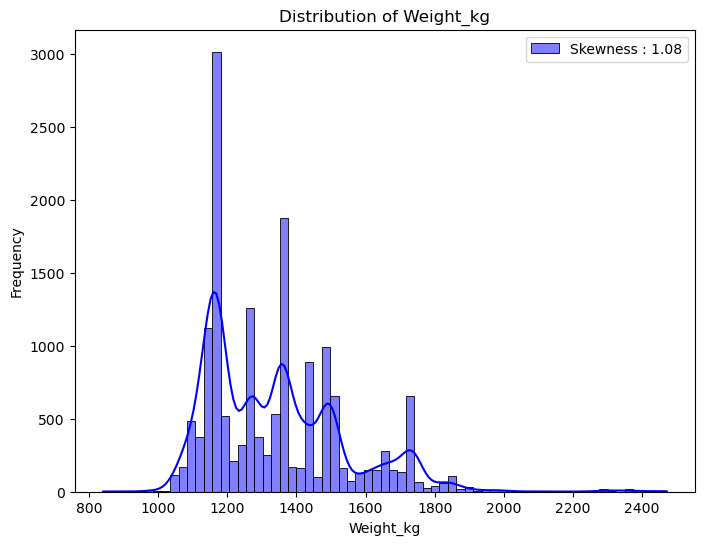

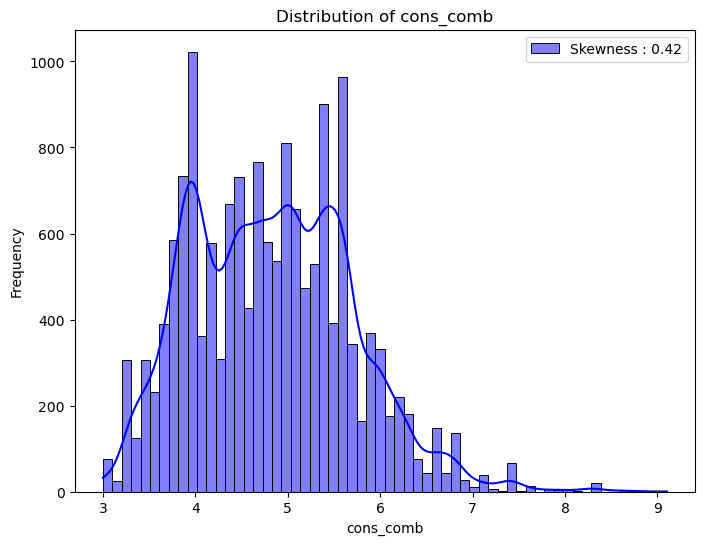

In [10]:
df_filtered = df.drop(columns="price")

numeric_cols = df_filtered.select_dtypes(include=['number']).columns

for col in numeric_cols:
    
    plt.figure(figsize=(8, 6))  
    g = sns.histplot(df_filtered[col], color="b", kde=True, label=f"Skewness : {df_filtered[col].skew():.2f}")
    
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
df.corr(numeric_only=True)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000000,-0.399291,0.530291,-0.473478,-0.144628,0.696411,0.008180,0.281824,0.468433,0.272261
km,-0.399291,1.000000,-0.033171,0.758306,0.157041,0.004217,-0.049443,0.306774,0.147098,-0.300198
Gears,0.530291,-0.033171,1.000000,-0.064524,-0.036612,0.449793,-0.011096,0.339507,0.333928,-0.003733
age,-0.473478,0.758306,-0.064524,1.000000,0.316108,-0.083254,-0.045511,0.215266,0.064883,-0.341303
Previous_Owners,-0.144628,0.157041,-0.036612,0.316108,1.000000,-0.022556,0.019545,0.027958,0.003443,-0.020172
hp_kW,0.696411,0.004217,0.449793,-0.083254,-0.022556,1.000000,0.036608,0.597485,0.638310,0.388912
Inspection_new,0.008180,-0.049443,-0.011096,-0.045511,0.019545,0.036608,1.000000,-0.025983,-0.035517,0.147814
Displacement_cc,0.281824,0.306774,0.339507,0.215266,0.027958,0.597485,-0.025983,1.000000,0.563375,0.037814
Weight_kg,0.468433,0.147098,0.333928,0.064883,0.003443,0.638310,-0.035517,0.563375,1.000000,0.088932
cons_comb,0.272261,-0.300198,-0.003733,-0.341303,-0.020172,0.388912,0.147814,0.037814,0.088932,1.000000


In [12]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,make_model[object],1. Audi A32. Audi A13. Opel Insignia4. Opel Astra5. Opel Corsa6. Renault Clio7. Renault Espace8. Renault Duster9. Audi A2,"3,097 (19.5%)2,614 (16.4%)2,598 (16.3%)2,525 (15.9%)2,216 (13.9%)1,839 (11.6%)991 (6.2%)34 (0.2%)1 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADT0lEQVR4nO3cwW0TaxiG0W8iiwsbW1GklAA9pAiKpQgXQQ9RlFkAl41ZIBYgBEaxHyNyTgO/F49mNKN5vRwOh4HC1aV/AM+H2MiIjYzYyIiNjNjIiI3MMjOvZubFBc7+fDgcPl7gXC5kc3Nz83a73V7XB6/r+rAsyzvBPR+b7XZ7fXd393G3232qDn18fHy53++v7+/vX8yM2J6JzczMbrf7dHt7+yE++1V8HhfmAYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MZubrJz/lofV5/B0267o+7Pf764k/+VnX9WFmPpdnclk+Cyez+K8PKtWVzVWMZvBi3MJMMHgxbuGbavBi3IKXunTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTOPngxbuGbZPBi3MKMz8IJGbyQ8YBAxm2UjHUVGesqMtZVZDwgkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcZn4WSsq8i4spExeCFj8ELG4IWMl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQ8Vk4GYMXMue8srma8Z2zDV6MXPjRWQYvRi78zDkHL0YufMdLXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3OWdZVFFT9ztnWVRRU/skEgY11F5pRXNlcyfulk6yprKn7nJOsqayqOccp1lTUVv+SlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mTDF4MXDjGyQYvBi78js/CyRi8kPmTK5srF09y9ODFoIWnOmrwYtDCKfzJ4MWghSfxUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mgcta6ynuIUjl5XWU/xVDYIZKyryHhAIHO1LMubZVk8AHB2VzPzemb+u/QP4d/nNkpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuZqZt7PzP+X/iH8+2wQyLiNkhEbGYMXMgYvZNxGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoybqNkxEZGbGTERkZsZMRGRmxkvgCzioPTY6d4mwAAAABJRU5ErkJggg=="">",0(0.0%)
2,body_type[object],1. Sedans2. Station wagon3. Compact4. Van5. Transporter6. Off-Road7. Coupe8. Convertible,"8,004 (50.3%)3,677 (23.1%)3,240 (20.4%)817 (5.1%)88 (0.6%)56 (0.4%)25 (0.2%)8 (0.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3dQY4SWwCG0VuE+J4TCCHpJfj20ItwsS6CRbiHTqcZqM8JDtSptga+KuCcFdx0vlRRpP5mOp1OAwqruQ/A/RAbGbGRERsZsZERG5lpjPF2jPFm7oNcoa+n0+nz3Ie4Juv9fv9+s9ns5j7ItTkej8/TNH0Q3OutN5vN7vHx8fN2u/0y92GuxcvLy7+Hw2H39PT0ZowhtldajzHGdrv98vDw8Gnuw1yZt3Mf4Np4QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOzHuP7KzNzH+Sa+Hv9nfXxeHw+HA674ZWZP3I8Hp/HGF/nPsc18Vr43/Na+B+a/PsFKku8srli3KjFDV4MSW7XogYvhiS3bYmDF0/FN8qXumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQWNXhZyjm4jMUNXgxJbpfXwskYvJDxgEBmCbdRt807Mfu6yprqfsy6rrKmui9LWFct4isXLs8DAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5lZ11XWVPdl9nWVNdX98Fo4GesqMq+5srnycBa/HbwYpHAuvxy8GKRwTq8ZvBikcBa+1CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiPzy8GLQQrn9NvBi0EK5+K1cDIGL2Q8IJD5eRsdbpVc2nq/378fYwwLKi5ttdlsdj+mfEv6zVFukM9sZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxk1j/WU2NYUHFhXgsnY11FxpWNjMELGYMXMr76ICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkbBDIWFeR8ZmNzGqapv+mafIjtlzcaozxbozxz9wH4fa5jZIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVmNMT6OMf6f+yDcPhsEMm6jZMRGxuCFjMELGbdRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNjXUXGuoqM2ygZsZERGxmxkREbGbGR+Qa/wA6oXVcdsAAAAABJRU5ErkJggg=="">",0(0.0%)
3,price[int64],Mean (sd) : 18024.4 (7381.7)min < med < max:4950.0 < 16900.0 < 74600.0IQR (CV) : 9050.0 (2.4),"2,952 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACcUlEQVR4nO3dvY7aQBSG4TOwIPMTI4QEHU3KSCkouYhcbNp0KbiCbVPRICQERjjrYIxTUWWzCzYO8znv049x8cq7g5hjl+e5Ab5rPPoGgGs8VXlx51zHzNolLnHM8/zlXvcDXZWF6pzrjEajL2EYDoteY7/fb51zX4kVVT5R22EYDufz+ctgMEhuXRxFUbBYLIabzaZtZoT6n6v0T7+Z2WAwSMbj8c+Cyzt3vRnIYjMFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCZX/cLqMLMtaZhY654os57xVjXgbahzHrTRNP0+n02az2bz5KAvnrerF21CPx+NTEATd2WyWTCaT7S1rOW9VP96GetHr9YqeueK8VY2wmYIEQoUEQoUEQoUEQoWEd3f9JQadhefzuVVgHfCHN

In [13]:
pr_df = ProfileReport(df)
pr_df

NameError: name 'ProfileReport' is not defined

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

## Feature Importance 

## 7. Visually Compare Models Performance In a Graph

## Prediction new observation

## random state=42

# !! (Dont forget Grid-Search)!!





# Congratulations

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |